In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
x = data[['Annual Income (k$)','Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [35]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [36]:
kmeans = KMeans(n_clusters=4,random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

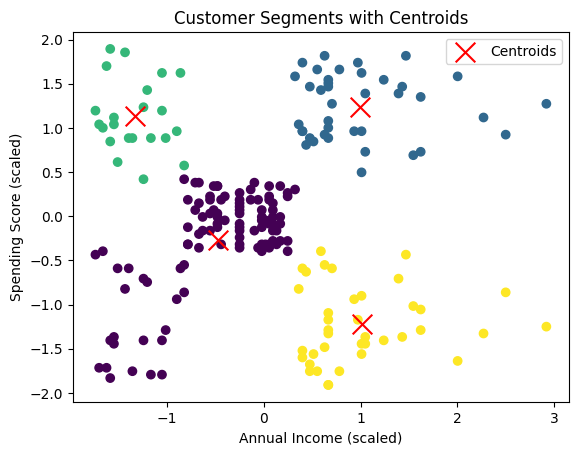

Cluster 0: Income = 48.17k$, Spending Score = 43.40
Cluster 1: Income = 86.54k$, Spending Score = 82.13
Cluster 2: Income = 25.73k$, Spending Score = 79.36
Cluster 3: Income = 87.00k$, Spending Score = 18.63


In [38]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segments with Centroids')
plt.legend()
plt.show()

centers = scaler.inverse_transform(kmeans.cluster_centers_)
for i, center in enumerate(centers):
    print(f"Cluster {i}: Income = {center[0]:.2f}k$, Spending Score = {center[1]:.2f}")